Beata Sirowy
# __Downloading data: csv__
Based on Matthes, E. (2023) _Python: Crash Course_


- We’ll use Python’s csv module to process weather data
stored in the CSV format and analyze high and low temperatures over time
in two different locations. 
- We’ll then use Matplotlib to generate a chart
based on our downloaded data to display variations in temperature in two
dissimilar environments: Sitka, Alaska, and Death Valley, California.


### Parsing the CSV File Headers


- We read the file and chain the splitlines()
method to get a list of all lines in the file, which we assign to lines.
- We build a reader object -  an object that can be used
to parse each line in the file. 
- To make a reader object, call the function
csv.reader() and pass it the list of lines from the CSV file.
- When given a reader object, the next() function returns the next line
in the file, starting from the beginning of the file. 
- Here we call next() only
once, so we get the first line of the file, which contains the file headers.
- We assign the data that’s returned to header_row.

In [ ]:
from pathlib import Path
import csv

path = Path(r"C:\Users\Beata\Documents\Python Scripts\Files\pcc_3e-main\chapter_16\the_csv_file_format\weather_data\sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
print(header_row) 

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


- To make it easier to understand the file header data, let’s print each header
and its position in the list:
- The enumerate() function returns both the index of each item and the
value of each item as you loop through a list.

In [4]:
reader = csv.reader(lines)
header_row = next(reader)

for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


Next, we'll extract the values with the indexes 2 and 4.
- We make an empty list called highs and then loop through the
remaining rows in the file

In [4]:
reader = csv.reader(lines)
header_row = next(reader)

highs = []
for row in reader:
    high = int(row[4])
    highs.append(high)

print(highs)

[44, 44, 43, 45, 45, 44, 48, 48, 46, 46, 44, 44, 39, 47, 48, 47, 46, 48, 42, 38, 41, 40, 38, 39, 37, 36, 30, 36, 40, 42, 43, 38, 38, 40, 39, 37, 37, 36, 30, 17, 30, 37, 39, 38, 37, 35, 38, 43, 43, 42, 44, 44, 42, 38, 39, 42, 43, 44, 45, 41, 41, 41, 43, 43, 43, 47, 40, 41, 40, 41, 37, 35, 34, 40, 42, 43, 40, 37, 39, 43, 42, 42, 40, 41, 42, 39, 41, 41, 41, 41, 36, 38, 41, 41, 40, 38, 41, 39, 39, 36, 41, 41, 45, 45, 48, 50, 56, 67, 61, 51, 57, 52, 63, 60, 53, 50, 51, 48, 47, 48, 50, 49, 48, 55, 63, 56, 50, 49, 52, 49, 49, 47, 49, 48, 49, 52, 56, 57, 52, 53, 49, 53, 50, 51, 51, 51, 49, 57, 58, 58, 56, 53, 51, 56, 58, 54, 58, 59, 53, 55, 59, 61, 67, 64, 58, 60, 66, 58, 68, 59, 55, 56, 63, 63, 59, 63, 78, 75, 61, 62, 61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66, 66, 62, 67, 65, 69, 63, 65, 63, 60, 60, 61, 65, 64, 60, 58, 64, 58, 59, 63, 61, 63, 68, 61, 59, 60, 63, 60, 60, 60, 65, 64, 61, 63, 60, 60, 59, 61, 64, 60,

We’ve extracted the high temperature for each date and stored each
value in a list. Now let’s create a visualization of this data.

### Plotting Data in a Temperature Chart

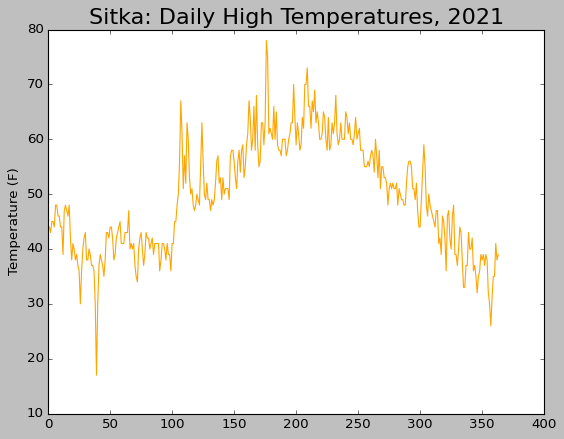

In [12]:

import matplotlib.pyplot as plt

# Plot the high temperatures.
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(highs, color='orange')

# Format plot.
ax.set_title("Sitka: Daily High Temperatures, 2021", fontsize=20)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=12)
ax.tick_params(labelsize=12)
plt.show()



#### The datetime Module

We need a way to convert the
string "2021-07-01" to an object representing this date.
- We can construct an object representing July 1, 2021, using the strptime() method from the
datetime module.

In [13]:
from datetime import datetime

first_date = datetime.strptime('2021-07-01', '%Y-%m-%d')
print(first_date)


2021-07-01 00:00:00


We first import the datetime class from the datetime module. Then we
call the method strptime() with the string containing the date we want to
process as its first argument. The second argument tells Python how the
date is formatted. In this example, '%Y-' tells Python to look for a four-digit

year before the first dash; '%m-' indicates a two-digit month before the sec-
ond dash; and '%d' means the last part of the string is the day of the month, from 1 to 31.

__Date and Time Formatting Arguments from
the datetime Module__

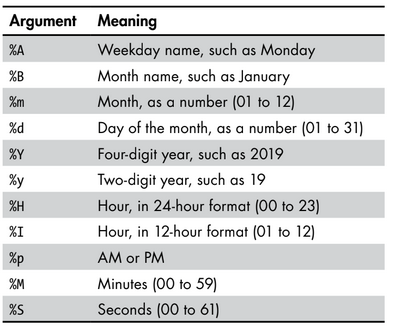

#### Plotting Dates

- We create two empty lists to store the dates and high temperatures
from the file. 
- We then convert the data containing the date information
(row[2]) to a datetime object  and append it to dates. 
- We pass the dates and the high temperature values to plot(). 
- The call to fig.autofmt_xdate()
draws the date labels diagonally to prevent them from overlapping.

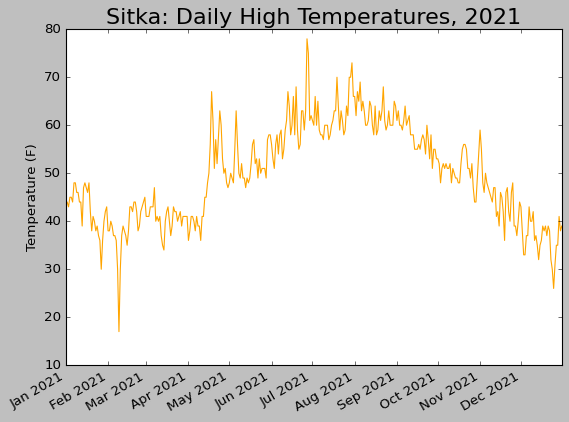

In [ ]:
path = Path(r"C:\Users\Beata\Documents\Python Scripts\Files\pcc_3e-main\chapter_16\the_csv_file_format\weather_data\sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs = [], []

for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
    
# Plot the high temperatures.
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='orange')

# Format plot.
ax.set_title("Sitka: Daily High Temperatures, 2021", fontsize=20)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=12)
ax.tick_params(labelsize=12)

fig.autofmt_xdate()

plt.show()

